In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import defaultdict
import pprint

In [2]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

In [11]:
# Loading the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Display dataset information
print(f"Feature names: {data.feature_names}")
print(f"Target names: {data.target_names}")

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']


## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [8]:
# Question 1: Base rate calculation for malignant cancer (label 0)
malignant_rate = np.mean(y == 0)
print(f"The base rate for malignant cancer (label 0) is: {malignant_rate:.4f}")

The base rate for malignant cancer (label 0) is: 0.3726


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


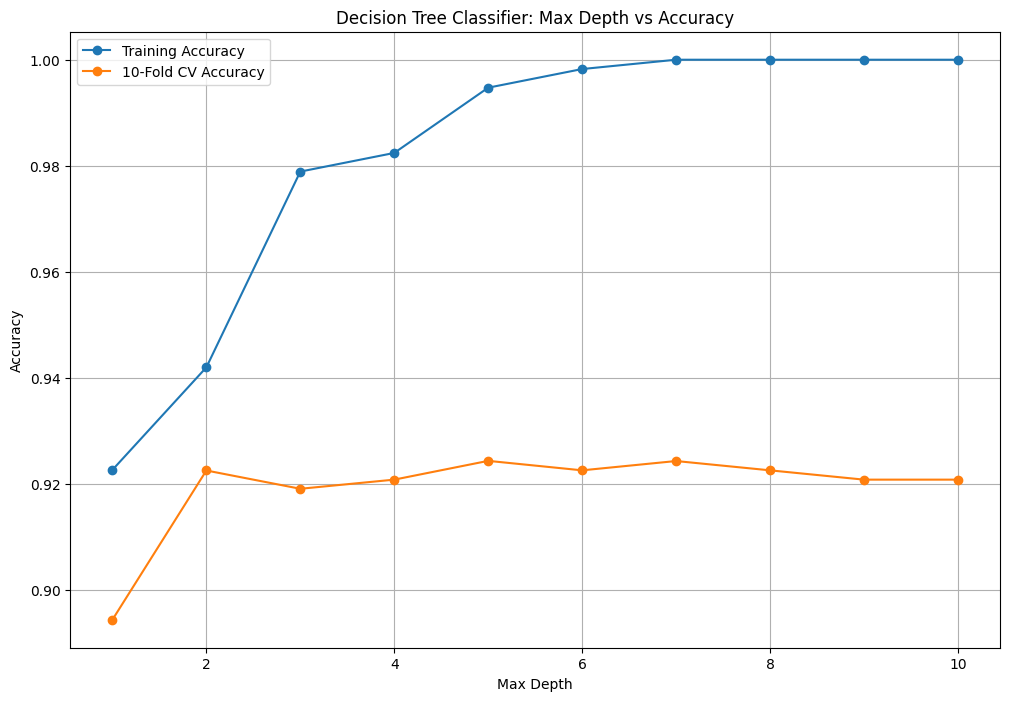

Best max_depth for training accuracy: 7
Best max_depth for 10-fold CV accuracy: 5


In [18]:
max_depths = range(1, 11)
train_accuracies = []
cv_accuracies = []

for max_depth in max_depths:
  # Initializing the DecisionTreeClassifier
  clf = DecisionTreeClassifier(max_depth=max_depth, random_state=RANDOM_STATE)

  # Fitting our data to the tree to calculate the score
  clf.fit(X, y)
  train_accuracy = clf.score(X, y)
  train_accuracies.append(train_accuracy)

  # Perform 10-fold cross-validation to calculate CV accuracy
  cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)))
  cv_accuracies.append(cv_accuracy)

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depths, cv_accuracies, label='10-Fold CV Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier: Max Depth vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

best_train_depth = max_depths[np.argmax(train_accuracies)]
best_cv_depth = max_depths[np.argmax(cv_accuracies)]

print(f'Best max_depth for training accuracy: {best_train_depth}')
print(f'Best max_depth for 10-fold CV accuracy: {best_cv_depth}')


### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
## cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** <br />
<font color=green><b>
The graph shows that at 'max_depth' of '7' '10-fold CV accuracy' have slightly better accuracy than at '10'. Also 'Training accuracy' starts to saturate at this point as well. Increasing the 'max_depth' further to '20' to check if there are any improvements showed that both '10-fold CV accuracy' & 'Training accuracy' plateaus after this point, suggesting potential overfitting. So the optimal 'max_depth' as per my analysis is '7' trading off between complexity/generalization vs over-fitting.  </b></font>

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** <br />
<font color=green><b>
'10-fold CV accuracy' peaks at 'max_depth' '5' & '7', optimal choice might be '5' trading off between accuracy vs complexity.
</b></font>

## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

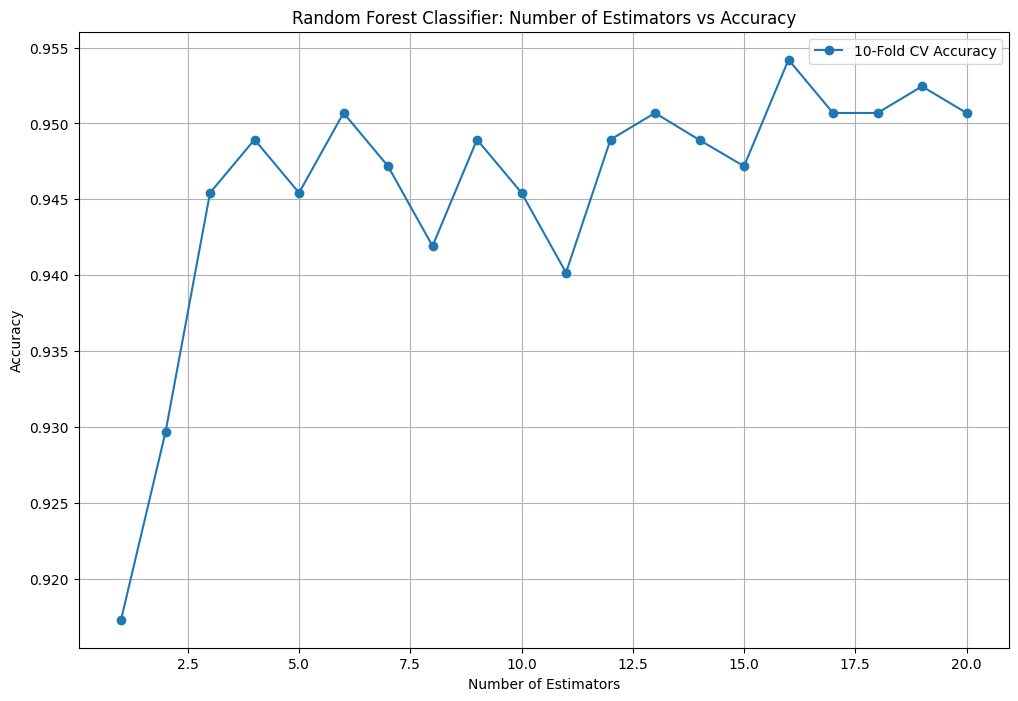

Best n_estimator value: 16


In [22]:
n_estimators_range = range(1, 21)
cv_accuracies_rf = []

# Choosing max_depth of '5' from 2(b)ii for optimal performance
best_max_depth = best_cv_depth

for n_estimators in n_estimators_range:
  # Initializing RandomForestClassifier
  clf_rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=best_max_depth, random_state=RANDOM_STATE)

  # Perform 10-fold cross-validation to calculate CV accuracy
  cv_accuracy_rf = np.mean(cross_val_score(clf_rf, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)))
  cv_accuracies_rf.append(cv_accuracy_rf)

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(n_estimators_range, cv_accuracies_rf, label='10-Fold CV Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier: Number of Estimators vs Accuracy')
plt.legend()
plt.grid(True)
plt.show()

best_n_estimators = n_estimators_range[np.argmax(cv_accuracies_rf)]
print(f"Best n_estimator value: {best_n_estimators}")


### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** <br/>
<font color='green'><b>
Yes, there is indeed an improvement in accuracy when using random forests, accuracy was around 0.92 when dealing with single tree and with random forests choosing 16 estimators it reaches 0.955(around 3.8% improvement)
</b></font>

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:** <br/>
<font color='green'><b>
Best accuracy was achieved when `n_estimators` was 16
</b></font>
### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

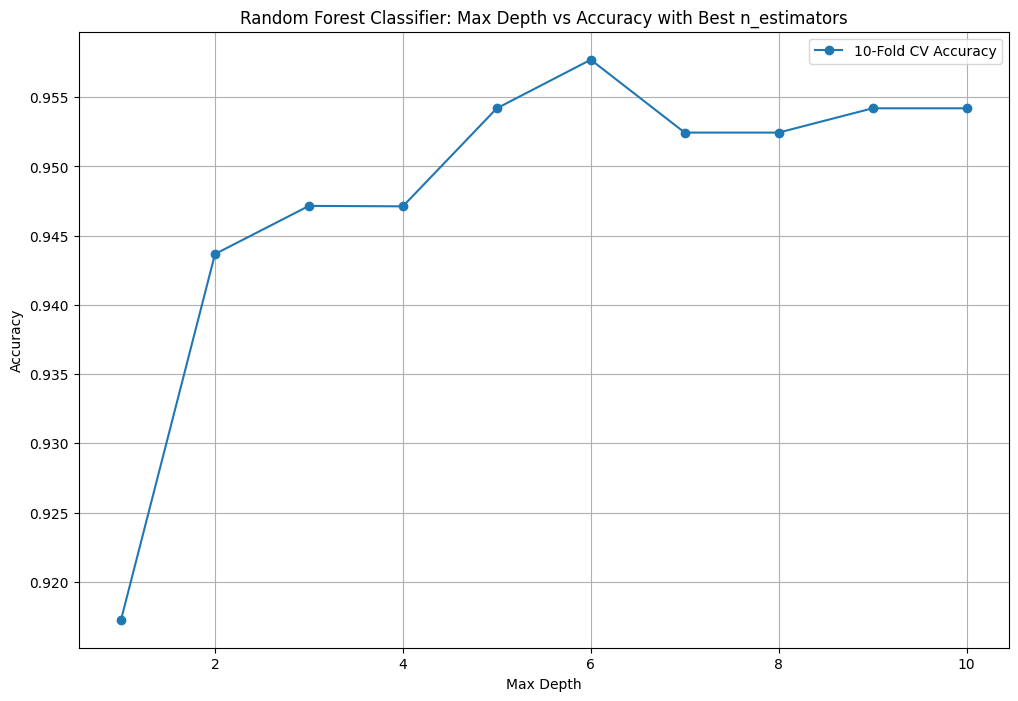

Best max_depth value: 6


In [25]:
max_depths_rf = range(1, 11)
cv_accuracies_rf_depth = []

for max_depth in max_depths_rf:
  # Initializing RandomForestClassifier with the best n_estimators(16) from previous step
  clf_rf_depth = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)

  # Performing 10-fold cross-validation to calculate CV accuracy
  cv_accuracy_rf_depth = np.mean(cross_val_score(clf_rf_depth, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)))
  cv_accuracies_rf_depth.append(cv_accuracy_rf_depth)

# Plotting the results
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths_rf, cv_accuracies_rf_depth, label='10-Fold CV Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier: Max Depth vs Accuracy with Best n_estimators')
plt.legend()
plt.grid(True)
plt.show()

best_max_depth_rf = max_depths_rf[np.argmax(cv_accuracies_rf_depth)]
print(f"Best max_depth value: {best_max_depth_rf}")


### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** <br/>
<font color='green'><b>
Optimal `max_depth` from this exercise was `6`, not the same as decision tree classifier `max_depth` which was `5` in 2(b)ii but close. Tried increasing the depth further to `20` but it plateaus after `9`.
</b></font>

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

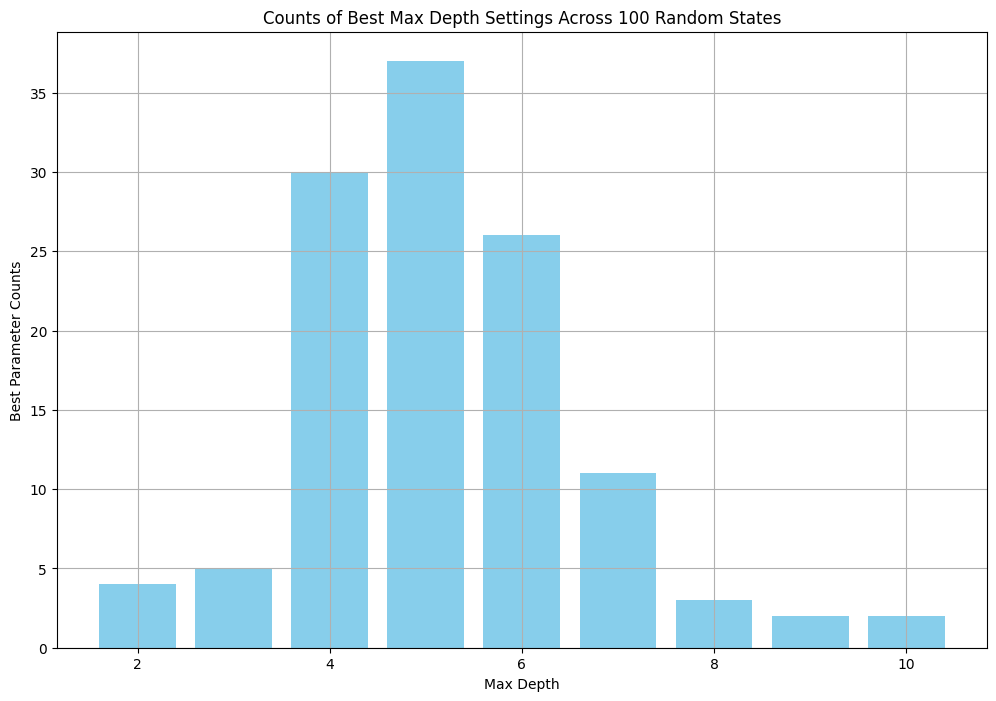

Top 2 Accuracy-Depth Pairs:
Accuracy: 0.9526002506265666, Depths: [6]
Accuracy: 0.9489661654135337, Depths: [5]


In [29]:
from collections import Counter

# Initializing the required variables
best_depth_counts = Counter()
accuracy_depth_pairs = []  # Stores (accuracy, depths) tuples for each random state

# Looping over random state values from 0 to 99
random_states = range(100)

for random_state in random_states:
  best_accuracy_for_state = 0
  best_accuracy_across_states = 0
  best_depths_for_state = []

  # Looping over max depth settings from 1 to 10
  for max_depth in range(1, 11):
    # Initializing the DecisionTreeClassifier
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

    # Performing 10-fold cross-validation to calculate CV accuracy
    cv_accuracy = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits=10, shuffle=True, random_state=random_state)))

    # Checking if the current max depth gives the best accuracy for this random state
    if cv_accuracy > best_accuracy_for_state:
      best_accuracy_for_state = cv_accuracy
      best_depths_for_state = [max_depth]  # Starting a new list of best depths for this random state
    elif cv_accuracy == best_accuracy_for_state:
      best_depths_for_state.append(max_depth)  # Appending the best depth to capture multiple best depth

  # Record the best max depth(s) for this random state
  best_depth_counts.update(best_depths_for_state)

  # print(f"Random State: {random_state}, Best Max Depth(s): {best_depths_for_state} for accuracy: {best_accuracy_for_state}")

  # Stores the best accuracy and corresponding depths for this random state
  accuracy_depth_pairs.append((best_accuracy_for_state, best_depths_for_state))

# Plotting the counts of best max depth settings
plt.figure(figsize=FIGSIZE)
plt.bar(best_depth_counts.keys(), best_depth_counts.values(), color='skyblue')
plt.xlabel('Max Depth')
plt.ylabel('Best Parameter Counts')
plt.title('Counts of Best Max Depth Settings Across 100 Random States')
plt.grid(True)
plt.show()

# Sorting the collection by accuracy in descending order
sorted_accuracy_depth_pairs = sorted(accuracy_depth_pairs, key=lambda x: x[0], reverse=True)

# Print the top 2 accuracy-depth pairs
top_2_accuracies = sorted_accuracy_depth_pairs[:2]

print("Top 2 Accuracy-Depth Pairs:")
for accuracy, depths in top_2_accuracies:
  print(f"Accuracy: {accuracy}, Depths: {depths}")


### (b)
What are the top two most frequent parameter settings?

**Student answer here:** <br/>
<font color='green'><b>
Depth `5` has yielded best accuracy more than 35 times, depth `4` has yielded best accuracy around `30` times, and `6` for `26` times.<br/>
Also best accuracy `0.9526002506265666` was yielded at depth `6`<br/>
Next was `0.9489661654135337` which was at depth `5`
</b></font>